**Importing necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv("C:/Users/aashi/Downloads/GUIDE_Train.csv")
test_data = pd.read_csv("C:/Users/aashi/Downloads/GUIDE_Test.csv")


C:\Users\aashi\AppData\Local\Temp\ipykernel_16992\685568233.py:7: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("C:/Users/aashi/Downloads/GUIDE_Test.csv")


**TRAIN DATA**

In [2]:
train_data.shape

(9516837, 45)

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [4]:
null_summary = pd.DataFrame({
    'Null Count': train_data.isna().sum(),
    'Null Percentage': (train_data.isna().sum() / len(train_data)) * 100
})

print(null_summary)

                    Null Count  Null Percentage
Id                           0         0.000000
OrgId                        0         0.000000
IncidentId                   0         0.000000
AlertId                      0         0.000000
Timestamp                    0         0.000000
DetectorId                   0         0.000000
AlertTitle                   0         0.000000
Category                     0         0.000000
MitreTechniques        5468386        57.460120
IncidentGrade            51340         0.539465
ActionGrouped          9460773        99.410897
ActionGranular         9460773        99.410897
EntityType                   0         0.000000
EvidenceRole                 0         0.000000
DeviceId                     0         0.000000
Sha256                       0         0.000000
IpAddress                    0         0.000000
Url                          0         0.000000
AccountSid                   0         0.000000
AccountUpn                   0         0

**Deleting columns which contain null values more than 50%**

In [5]:
threshold= len(train_data)* 0.5   # removing 50% above null value
train_data = train_data.dropna(thresh=threshold,axis=1)

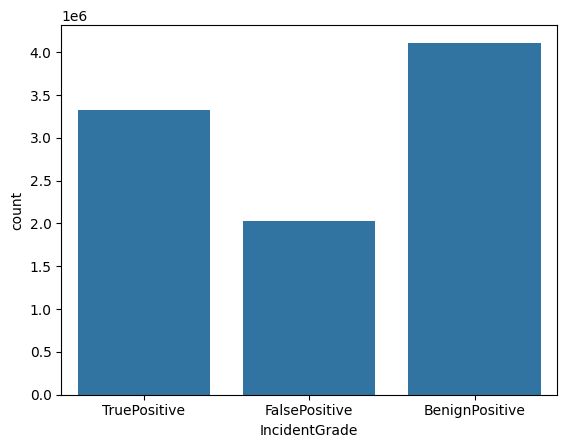

In [6]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=train_data)
plt.show()

In [7]:
# Count and percentage calculation for each unique value in 'IncidentGrade'
incident_grade_summary = train_data['IncidentGrade'].value_counts(normalize=True).mul(100).to_frame(name='Percentage')
incident_grade_summary['Count'] = train_data['IncidentGrade'].value_counts()

# Reset index to have 'IncidentGrade' as a column
incident_grade_summary = incident_grade_summary.reset_index().rename(columns={'index': 'IncidentGrade'})
print(incident_grade_summary)

    IncidentGrade  Percentage    Count
0  BenignPositive   43.429489  4110817
1    TruePositive   35.103418  3322713
2   FalsePositive   21.467093  2031967


In [8]:
# Dropping rows with null values in the 'IncidentGrade' column
train_data = train_data.dropna(subset=['IncidentGrade'])

In [9]:
# Check for any duplicate rows
duplicates = train_data[train_data.duplicated()]

# Display duplicate rows, if any
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 542692


In [10]:
train_data.drop_duplicates(inplace=True)
print('Shape of Train Dataset after dropping Duplicate values', train_data.shape)

Shape of Train Dataset after dropping Duplicate values (8922805, 35)


In [11]:
train_data.isna().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [12]:
train_data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,...,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,...,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,...,3421,881,289573,117668,3586,5,66,242,1445,10630


In [13]:
train_data.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,...,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06,8.922805e+06
mean,8.416239e+11,1.693878e+02,7.002754e+04,4.181938e+05,1.123235e+02,2.939287e+03,9.548293e+04,1.281687e+05,2.810067e+05,1.510310e+05,...,3.337589e+03,8.807819e+02,2.606447e+05,1.069810e+05,3.583331e+03,4.893109e+00,6.458361e+01,2.226101e+02,1.346200e+03,9.897008e+03
std,4.967961e+11,3.717533e+02,1.215173e+05,4.642047e+05,4.306532e+02,1.120613e+04,1.679943e+04,3.489336e+04,1.443226e+05,3.648999e+04,...,5.266234e+02,1.333356e+01,8.363888e+04,3.310855e+04,9.277551e+01,7.216642e-01,9.555620e+00,6.443864e+01,3.600480e+02,2.673986e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,9.000000e+00,4.430000e+02,2.020800e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.000000e+01,8.564000e+03,2.310280e+05,1.000000e+01,1.400000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.550000e+02,8.151500e+04,7.033120e+05,5.000000e+01,2.150000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.144000e+03,5.997060e+05,1.721456e+06,9.522000e+03,1.131740e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [14]:
# Summary statistics for categorical features
categorical_features = ["Category", "EntityType", "EvidenceRole","IncidentGrade"]
print(train_data[categorical_features].describe())

             Category EntityType EvidenceRole   IncidentGrade
count         8922805    8922805      8922805         8922805
unique             20         33            2               3
top     InitialAccess         Ip      Related  BenignPositive
freq          3752038    2174998      4808045         3827800


In [15]:
train_data.nunique()

Id                     707108
OrgId                    5340
IncidentId             448901
AlertId               1248789
Timestamp              755654
DetectorId               7813
AlertTitle              79952
Category                   20
IncidentGrade               3
EntityType                 33
EvidenceRole                2
DeviceId                75557
Sha256                 106416
IpAddress              285957
Url                    123252
AccountSid             353113
AccountUpn             524760
AccountObjectId        338252
AccountName            363254
DeviceName             114267
NetworkMessageId       375196
RegistryKey              1341
RegistryValueName         525
RegistryValueData         699
ApplicationId            1728
ApplicationName          2681
OAuthApplicationId        703
FileName               222085
FolderPath              87832
ResourceIdName           2283
OSFamily                    6
OSVersion                  58
CountryCode               236
State     

In [16]:
# Converting Timestamp to date time

train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])
print(train_data['Timestamp'].dtype)

train_data['Timestamp'].head()

datetime64[ns, UTC]


0   2024-06-04 06:05:15+00:00
1   2024-06-14 03:01:25+00:00
2   2024-06-13 04:52:55+00:00
3   2024-06-10 16:39:36+00:00
4   2024-06-15 01:08:07+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [17]:
# Extracting Day, Month, Year, Hour and Time from Timestamp

train_data["Day"] = train_data["Timestamp"].dt.day
train_data["Month"] = train_data["Timestamp"].dt.month
train_data["Year"] = train_data["Timestamp"].dt.year
train_data["Hour"] = train_data["Timestamp"].dt.hour
train_data["Time"] = train_data["Timestamp"].dt.time

# dropping TimeStamp Column
train_data.drop("Timestamp",axis=1,inplace=True)
train_data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,180388628218,0,612,123247,7,6,InitialAccess,TruePositive,Ip,Related,...,5,66,31,6,3,4,6,2024,6,06:05:15
1,455266534868,88,326,210035,58,43,Exfiltration,FalsePositive,User,Impacted,...,5,66,242,1445,10630,14,6,2024,3,03:01:25
2,1056561957389,809,58352,712507,423,298,InitialAccess,FalsePositive,Url,Related,...,5,66,242,1445,10630,13,6,2024,4,04:52:55
3,1279900258736,92,32992,774301,2,2,CommandAndControl,BenignPositive,Url,Related,...,5,66,242,1445,10630,10,6,2024,16,16:39:36
4,214748368522,148,4359,188041,9,74,Execution,TruePositive,User,Impacted,...,5,66,242,1445,10630,15,6,2024,1,01:08:07


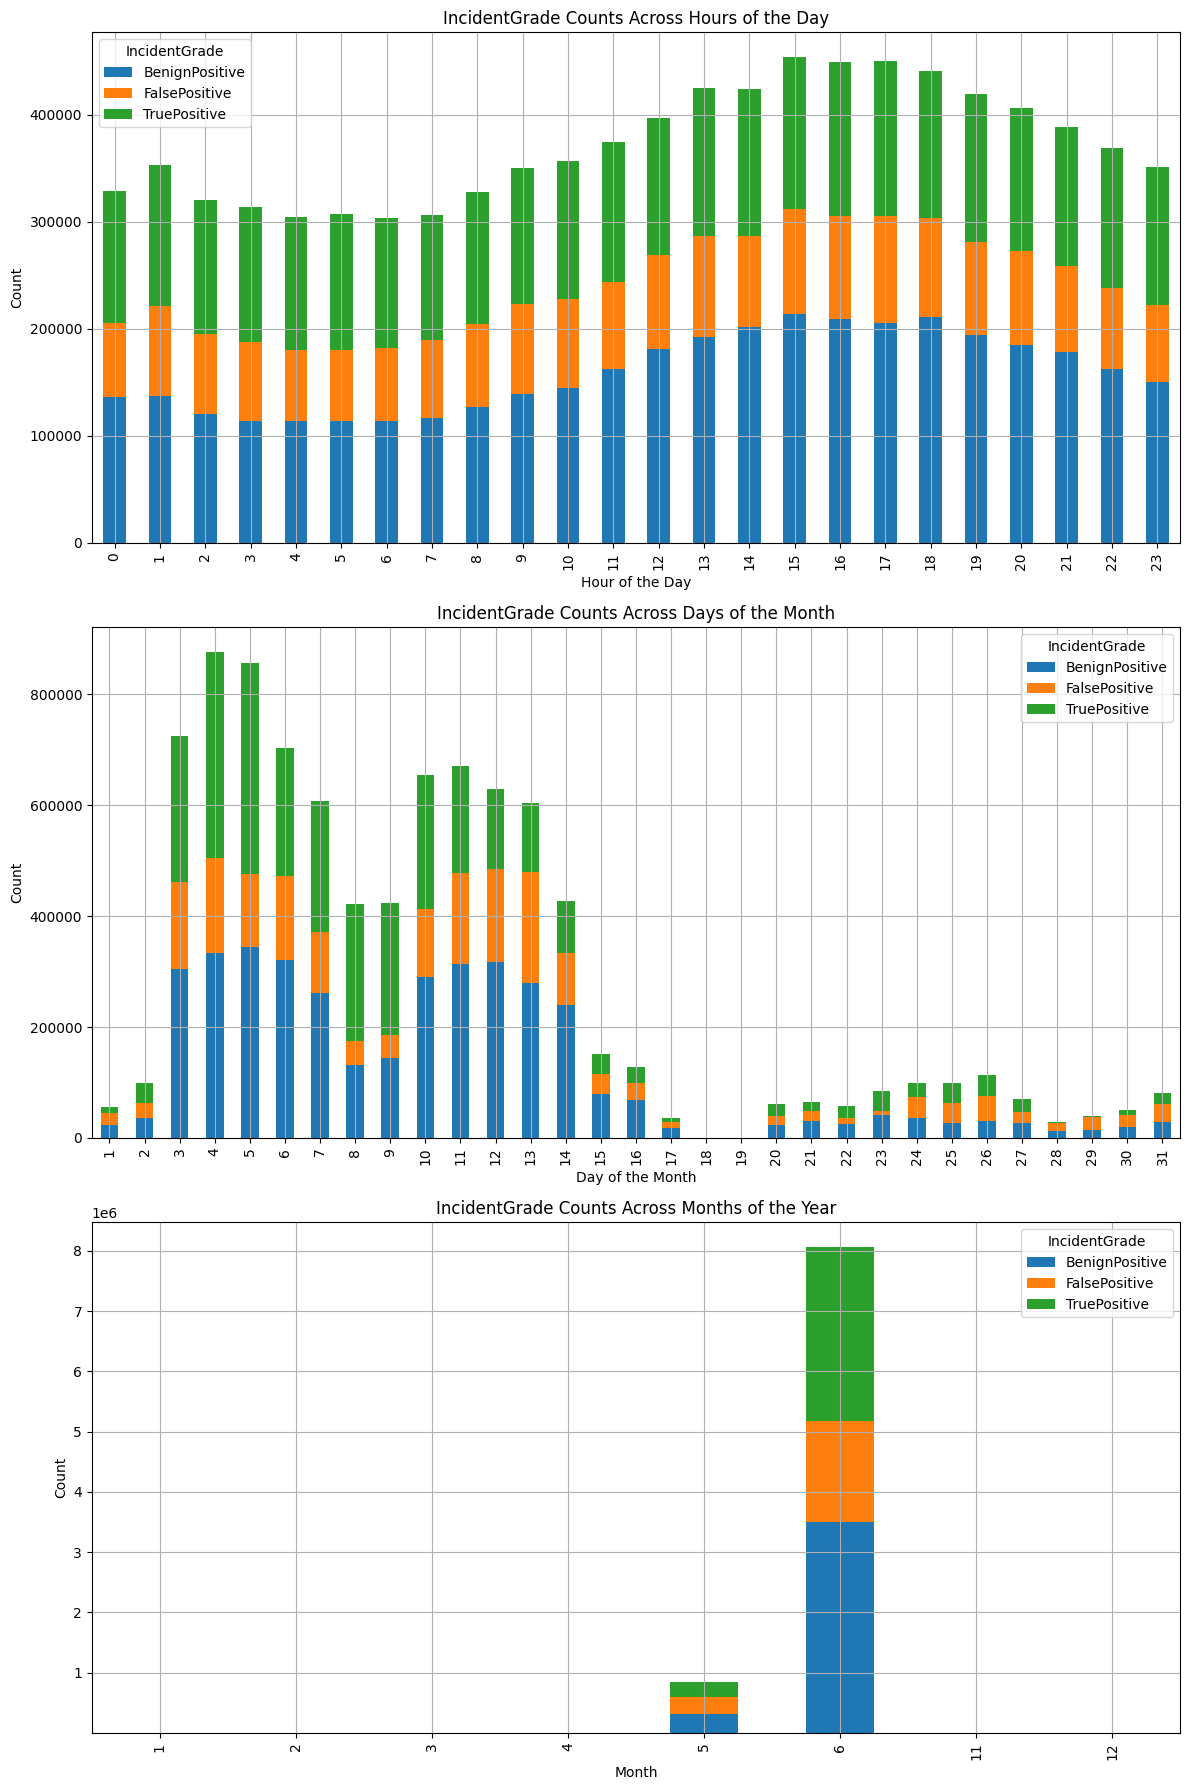

In [18]:
# Aggregate data
hour_incident_grade = train_data.groupby(['Hour', 'IncidentGrade']).size().unstack()
day_incident_grade = train_data.groupby(['Day', 'IncidentGrade']).size().unstack()
month_incident_grade = train_data.groupby(['Month', 'IncidentGrade']).size().unstack()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Hourly distribution (stacked bar plot)
hour_incident_grade.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("IncidentGrade Counts Across Hours of the Day")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Count")
axes[0].legend(title='IncidentGrade')
axes[0].grid(True)

# Daily distribution (stacked bar plot)
day_incident_grade.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("IncidentGrade Counts Across Days of the Month")
axes[1].set_xlabel("Day of the Month")
axes[1].set_ylabel("Count")
axes[1].legend(title='IncidentGrade')
axes[1].grid(True)

# Monthly distribution (stacked bar plot)
month_incident_grade.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title("IncidentGrade Counts Across Months of the Year")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Count")
axes[2].legend(title='IncidentGrade')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

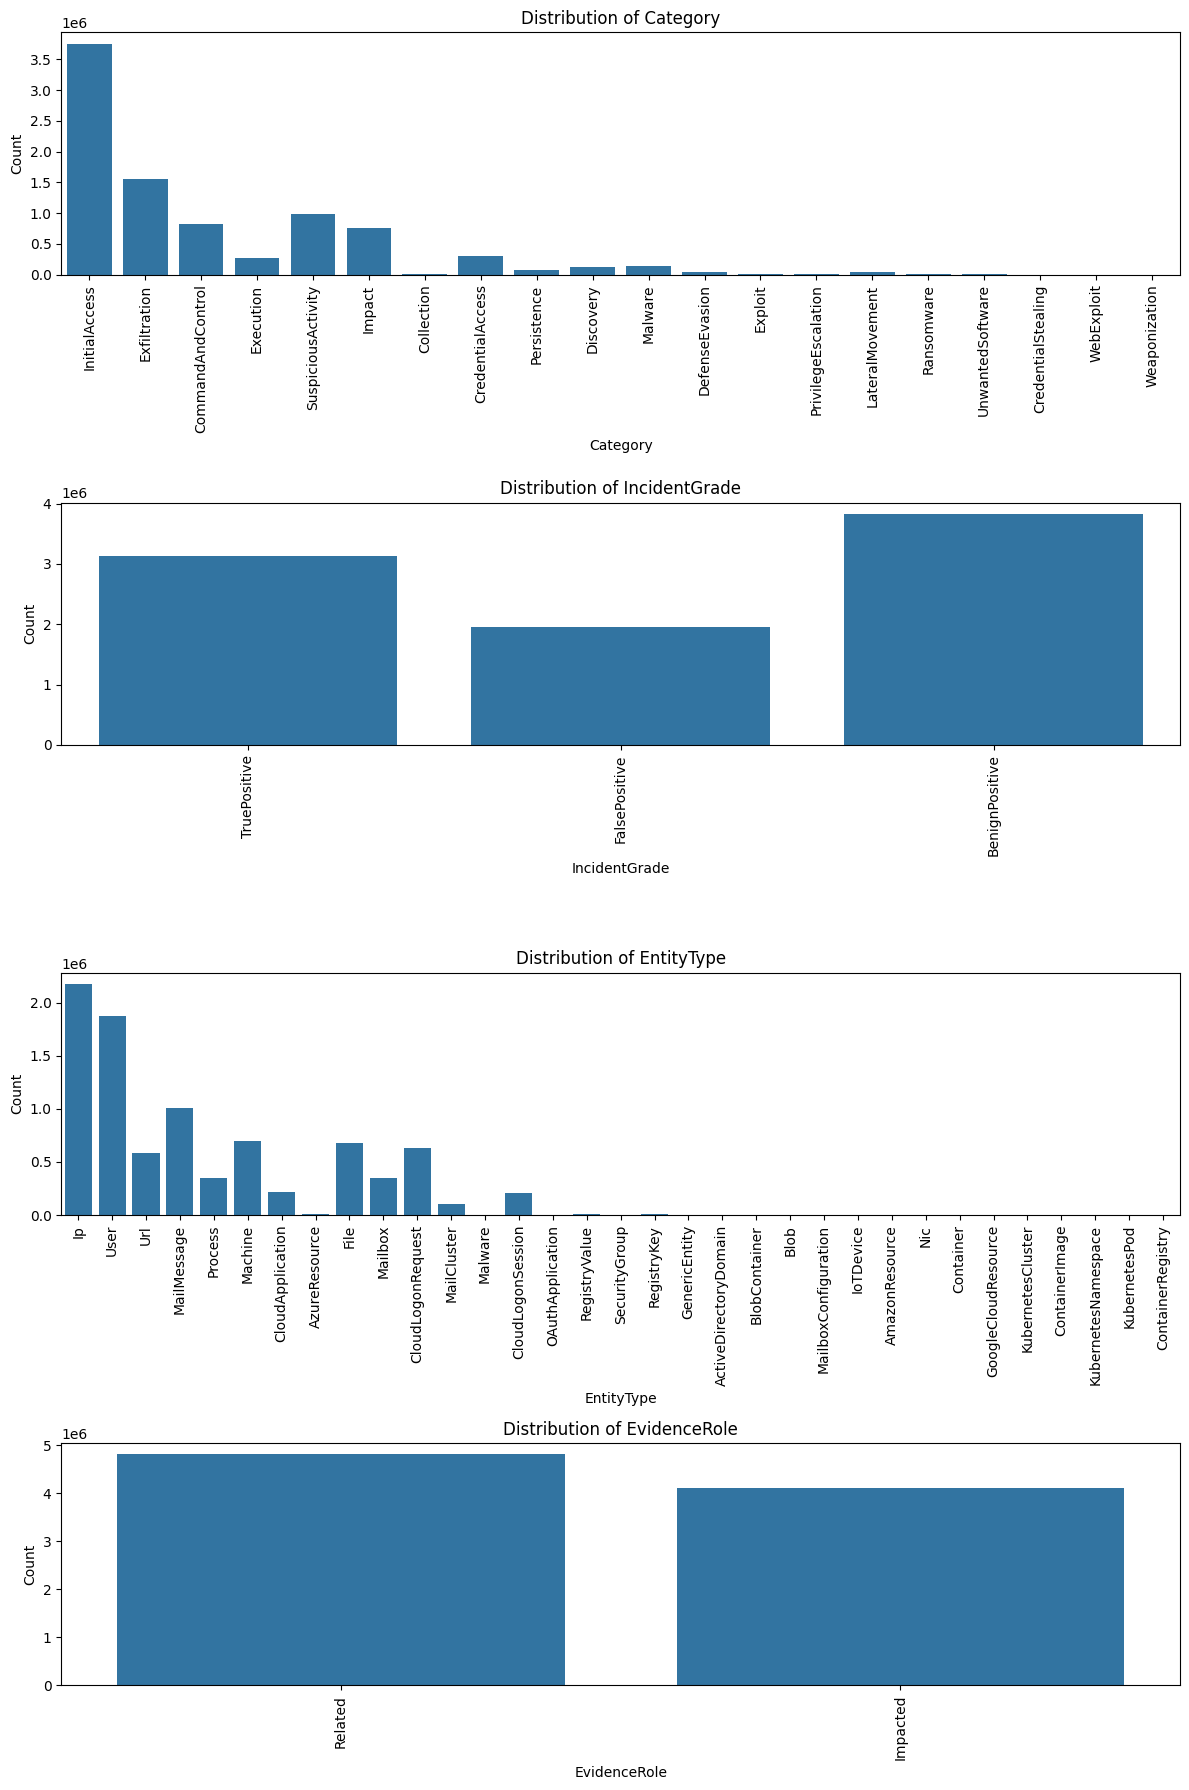

In [19]:
categorical_columns = ['Category', 'IncidentGrade', 'EntityType','EvidenceRole']

# Create subplots for each categorical column
fig, axes = plt.subplots(4, 1, figsize=(12, 18))

# Plot each column as a count plot
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=train_data, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability if needed

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [20]:
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')

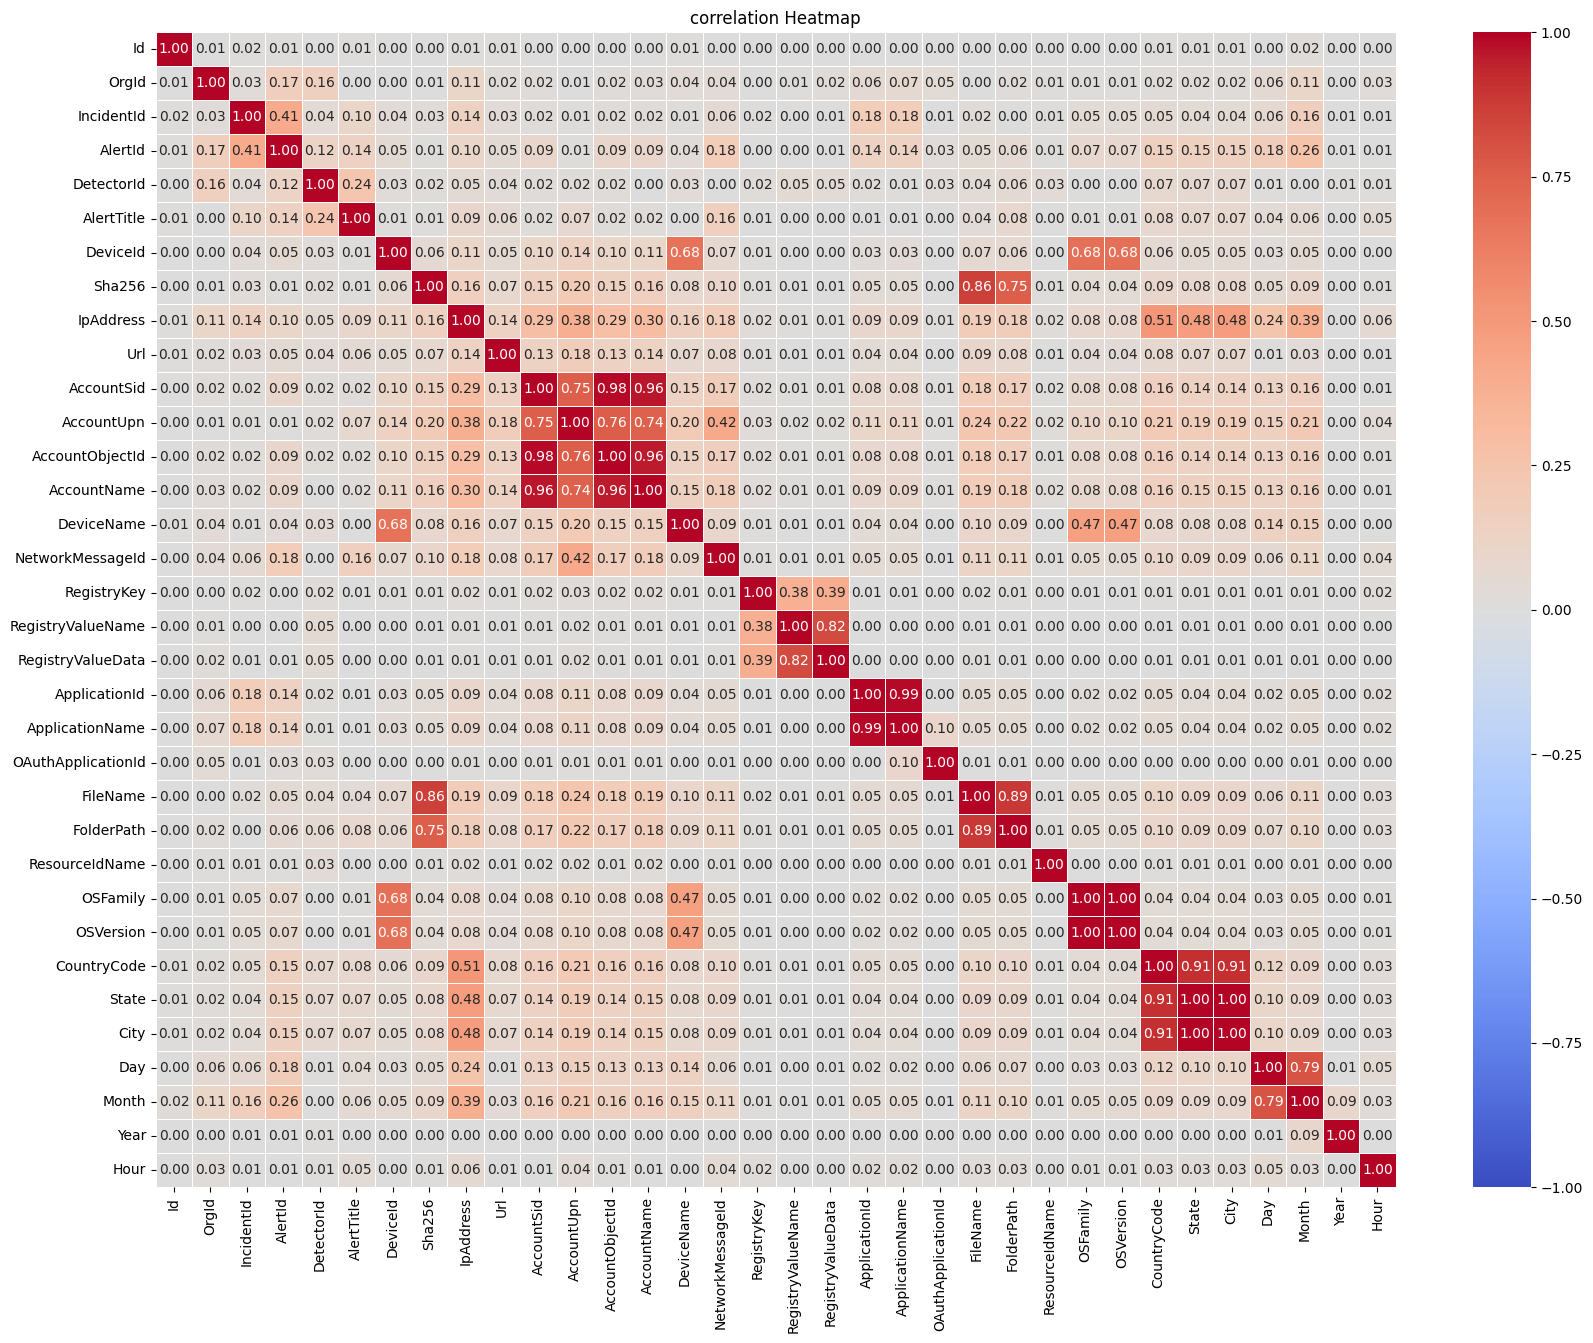

In [21]:
# selecting numerical col
numeric_df=train_data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [22]:
# Dropping Highly Correlated Columns
# Correlated above 65% 
train_data.drop(["DeviceId","DeviceName","OSFamily","OSVersion","Sha256","FileName","FolderPath",
                "AccountSid","AccountUpn","AccountObjectId", "AccountName", "RegistryValueName" ,
                "RegistryValueData", "ApplicationId", "ApplicationName", "CountryCode", "State", 
                "City", "Day", "Month"], axis =1 , inplace = True)

In [23]:
train_data.shape

(8922805, 19)

In [24]:
# checking the uique values in columns

columns = train_data.select_dtypes(include=['float64', 'int64','object']).columns

In [25]:
for col in columns:
    
    # Print the number of unique values in each column
    unique_count = train_data[col].nunique()  # Count unique values
    print(f"'{col}' : {unique_count}")

'Id' : 707108
'OrgId' : 5340
'IncidentId' : 448901
'AlertId' : 1248789
'DetectorId' : 7813
'AlertTitle' : 79952
'Category' : 20
'IncidentGrade' : 3
'EntityType' : 33
'EvidenceRole' : 2
'IpAddress' : 285957
'Url' : 123252
'NetworkMessageId' : 375196
'RegistryKey' : 1341
'OAuthApplicationId' : 703
'ResourceIdName' : 2283
'Time' : 86400


In [26]:
# Encoding categorical variables

categorical = train_data.select_dtypes(include=['object']).columns

for feature in categorical:
    encoder = LabelEncoder()
    train_data[feature] = encoder.fit_transform(train_data[feature])

train_data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,NetworkMessageId,RegistryKey,OAuthApplicationId,ResourceIdName,Year,Hour,Time
0,180388628218,0,612,123247,7,6,10,2,15,1,27,160396,529644,1631,881,3586,2024,6,21915
1,455266534868,88,326,210035,58,43,7,1,32,0,360606,160396,529644,1631,881,3586,2024,3,10885
2,1056561957389,809,58352,712507,423,298,10,1,31,1,360606,68652,529644,1631,881,3586,2024,4,17575
3,1279900258736,92,32992,774301,2,2,1,0,31,1,360606,13,529644,1631,881,3586,2024,16,59976
4,214748368522,148,4359,188041,9,74,6,2,32,0,360606,160396,529644,1631,881,3586,2024,1,4087


In [27]:
#Saving the file
train_data.to_csv('traindata_processed.csv', index=False)

**TEST DATA**

In [28]:
test_data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [29]:
test_data.shape

(4147992, 46)

In [30]:
# Check for any duplicate rows
duplicates = test_data[test_data.duplicated()]

# Display duplicate rows, if any
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 104


In [31]:
test_data.drop_duplicates(inplace=True)
print('Shape of the Test dataset after dropping duplicate values :', test_data.shape)

Shape of the Test dataset after dropping duplicate values : (4147888, 46)


In [32]:
null_summary = pd.DataFrame({
    'Null Count': test_data.isna().sum(),
    'Null Percentage': (test_data.isna().sum() / len(test_data)) * 100
})

print(null_summary)

                    Null Count  Null Percentage
Id                           0         0.000000
OrgId                        0         0.000000
IncidentId                   0         0.000000
AlertId                      0         0.000000
Timestamp                    0         0.000000
DetectorId                   0         0.000000
AlertTitle                   0         0.000000
Category                     0         0.000000
MitreTechniques        2307084        55.620692
IncidentGrade                0         0.000000
ActionGrouped          4145975        99.953880
ActionGranular         4145975        99.953880
EntityType                   0         0.000000
EvidenceRole                 0         0.000000
DeviceId                     0         0.000000
Sha256                       0         0.000000
IpAddress                    0         0.000000
Url                          0         0.000000
AccountSid                   0         0.000000
AccountUpn                   0         0

In [33]:
# Converting Timestamp to date time

test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'])
print(test_data['Timestamp'].dtype)

test_data['Timestamp'].head()

datetime64[ns, UTC]


0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [34]:
# Extracting Day, Month, Year, Hour and Time from Timestamp

test_data["Day"] = test_data["Timestamp"].dt.day
test_data["Month"] = test_data["Timestamp"].dt.month
test_data["Year"] = test_data["Timestamp"].dt.year
test_data["Hour"] = test_data["Timestamp"].dt.hour
test_data["Time"] = test_data["Timestamp"].dt.time

# dropping TimeStamp Column
test_data.drop("Timestamp",axis=1,inplace=True)
test_data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,...,LastVerdict,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,...,Suspicious,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,NaN,BenignPositive,NaN,...,Suspicious,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,...,Suspicious,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,...,NaN,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,...,NaN,242,1445,10630,Public,6,6,2024,17,17:42:05


In [35]:
#Dropping NaN columns and highly correlated columns
test_data.drop(["DeviceId","DeviceName","OSFamily","OSVersion","Sha256","FileName","FolderPath",
                "AccountSid","AccountUpn","AccountObjectId", "AccountName", "RegistryValueName" ,
                "RegistryValueData", "ApplicationId", "ApplicationName", "CountryCode", "State", 
                "City", "Day", "Month",
                "MitreTechniques","ActionGrouped","ActionGranular","EmailClusterId","ThreatFamily","ResourceType","Roles",
                "AntispamDirection","SuspicionLevel","LastVerdict"], axis =1 , inplace = True)

In [36]:
test_data.drop('Usage',axis=1,inplace=True)

In [37]:
test_data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,NetworkMessageId,RegistryKey,OAuthApplicationId,ResourceIdName,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,360606,160396,529644,1631,881,3586,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,360606,160396,529644,1631,881,3586,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,360606,160396,529644,1631,881,3586,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,360606,160396,529644,1631,881,3586,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,360606,160396,529644,1631,881,3586,2024,17,17:42:05


In [38]:
test_data.dtypes

Id                     int64
OrgId                  int64
IncidentId             int64
AlertId                int64
DetectorId             int64
AlertTitle             int64
Category              object
IncidentGrade         object
EntityType            object
EvidenceRole          object
IpAddress              int64
Url                    int64
NetworkMessageId       int64
RegistryKey            int64
OAuthApplicationId     int64
ResourceIdName         int64
Year                   int32
Hour                   int32
Time                  object
dtype: object

In [39]:
# Encoding categorical variables of testdata

categorical = test_data.select_dtypes(include=['object']).columns

for feature in categorical:
    encoder = LabelEncoder()
    test_data[feature] = encoder.fit_transform(test_data[feature])

test_data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,NetworkMessageId,RegistryKey,OAuthApplicationId,ResourceIdName,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,360606,160396,529644,1631,881,3586,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,360606,160396,529644,1631,881,3586,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,360606,160396,529644,1631,881,3586,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,360606,160396,529644,1631,881,3586,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,360606,160396,529644,1631,881,3586,2024,17,63665


In [40]:
#Saving the file
test_data.to_csv('testdata_processed.csv', index=False)